In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import os

In [30]:
# Load the CSV
file_path = r"C:\Users\castl\Desktop\Internship stuff\fL_Data\Extracted\HERA_2010.csv"
df = pd.read_csv(file_path)

In [31]:
# Extract independent variables and observable
Q2 = df['Q^2'].values
xB = df['xB'].values
FL = df['FL'].values

Plot saved to: C:\Users\castl\Desktop\Internship stuff\fL_Data\Extracted\SurfacePlots\Longitudinal_Structure_Function_Surface_EMC.png


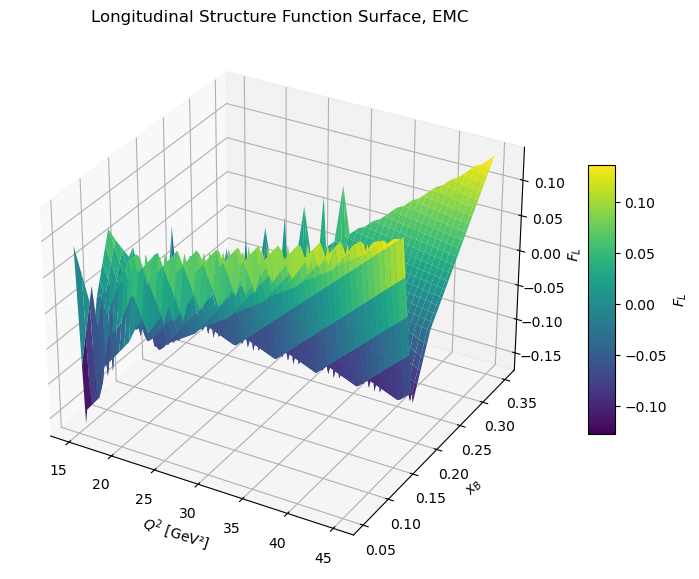

In [32]:
#Plotting
# Create a regular grid for interpolation
Q2_lin = np.linspace(Q2.min(), Q2.max(), 100)
xB_lin = np.linspace(xB.min(), xB.max(), 100)
Q2_grid, xB_grid = np.meshgrid(Q2_lin, xB_lin)

# Interpolate FL onto the grid
FL_grid = griddata((Q2, xB), FL, (Q2_grid, xB_grid), method='linear')

# Make surface plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Q2_grid, xB_grid, FL_grid, cmap='viridis', edgecolor='none')
ax.set_xlabel(r'$Q^2$ [GeV²]')
ax.set_ylabel(r'$x_B$')
ax.set_zlabel(r'$F_L$')
ax.set_title('Longitudinal Structure Function Surface, HERA_2010')
fig.colorbar(surf, shrink=0.5, aspect=10, label=r'$F_L$')

# Get the title from the plot and clean it for filename
graph_title = ax.get_title()
# Remove characters that aren't allowed in Windows filenames
safe_title = "".join(c for c in graph_title if c.isalnum() or c in (' ', '-', '_')).rstrip()
safe_title = safe_title.replace(' ', '_')  # Replace spaces with underscores

# Create the full file path
base_path = r"C:\Users\castl\Desktop\Internship stuff\fL_Data\Extracted\SurfacePlots"
file_name = f"{safe_title}.png"
full_path = os.path.join(base_path, file_name)

# Create directory if it doesn't exist
os.makedirs(base_path, exist_ok=True)

# Save the figure
plt.savefig(full_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to: {full_path}")

plt.show()